In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_boston, load_diabetes 
import random

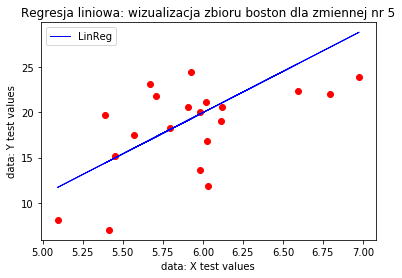

In [2]:
boston = load_boston()

# Przekształcenie naszego zbioru w tabele 2D
boston_X = boston.data[:,np.newaxis, 5]
        
# Wydzielenie zbiorów testowych
boston_X_test = boston_X[-20:]
boston_y_test = boston.target[-20:]
        
# Wydzielenie zbiorów treningowych
boston_X_train = boston_X[:-20]
boston_y_train = boston.target[:-20]
        
# Trening modelu regresji liniowej za pomocą naszych zbiorów 
regr = linear_model.LinearRegression()
regr.fit(boston_X_train, boston_y_train)
        
plt.scatter(boston_X_test, boston_y_test,  color='red')
plt.plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=1, label='LinReg')
plt.title('Regresja liniowa: wizualizacja zbioru boston dla zmiennej nr 5')
plt.legend()
plt.xlabel('data: X test values')
plt.ylabel('data: Y test values')
plt.show()        

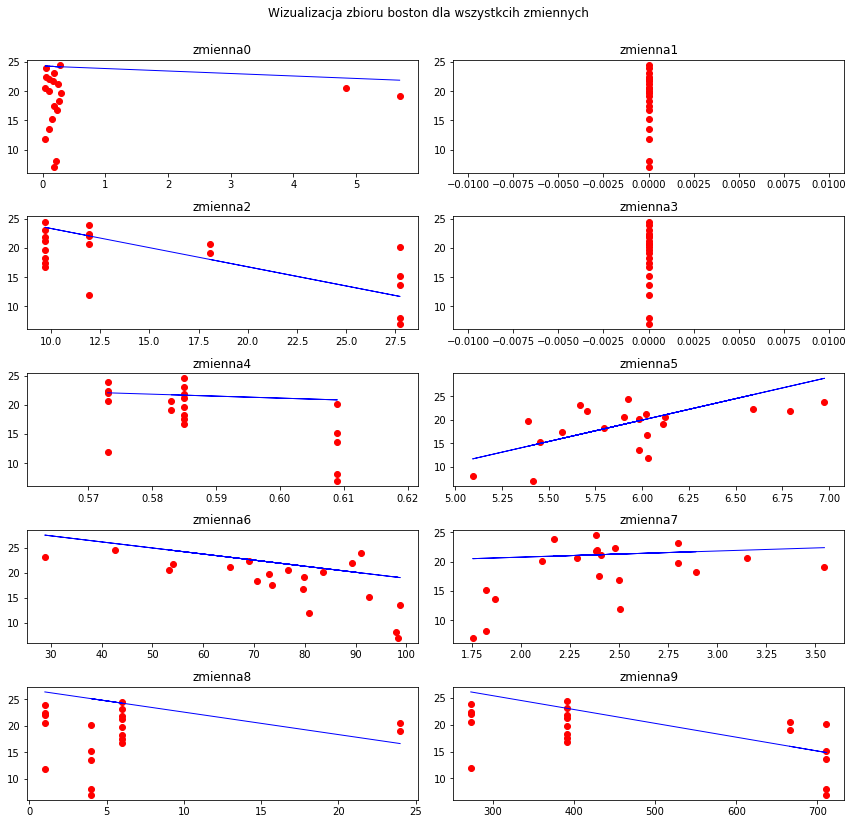

In [3]:
boston = load_boston()

f, axarr = plt.subplots(5,2,figsize=(12,12))
for i in range(0,5):
    for j in range(0,2):
        
        boston_X = boston.data[:, np.newaxis, i*2+j]
        
        # Wydzielenie zbiorów testowych
        boston_X_test = boston_X[-20:]
        boston_y_test = boston.target[-20:]
        
        # Wydzielenie zbiorów treningowych
        boston_X_train = boston_X[:-20]
        boston_y_train = boston.target[:-20]
        
        # Trening modelu regresji liniowej za pomocą naszych zbiorów 
        regr = linear_model.LinearRegression()
        regr.fit(boston_X_train, boston_y_train)
        
        # Plot outputs
        axarr[i,j].scatter(boston_X_test, boston_y_test,  color='red')
        axarr[i,j].plot(boston_X_test, regr.predict(boston_X_test), color='blue', linewidth=1)
        axarr[i,j].set_title('zmienna'+str(i*2+j))
f.suptitle('Wizualizacja zbioru boston dla wszystkcih zmiennych')
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

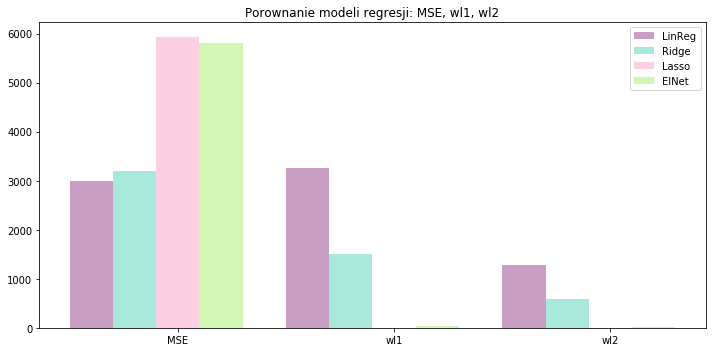

In [4]:
diabetes = load_diabetes()

diabetes_X = diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]

diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

regressors = {}
regressors['LinReg'] =linear_model.LinearRegression()
regressors['Ridge'] = linear_model.Ridge(alpha = .5)
regressors['Lasso'] = linear_model.Lasso(alpha = 5.1)
regressors['ElNet'] =linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)
fit_results={}
for key in regressors:

    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    # obliczanie błedu 
    mse = np.mean((regr.predict(diabetes_X_train) - diabetes_y_train) ** 2)
    w = regr.coef_
        # l1 norm
    wl1 = np.sum(np.abs(w))
        # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
groups = 3
index = np.arange(groups)
bar_width = 0.2
opacity = 0.4
fig, ax = plt.subplots(figsize=(10,5))
t=0
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, 
            res_val, 
            bar_width,
            alpha=opacity,
            color=np.random.rand(1,3),
           label=key)
    t+=1
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

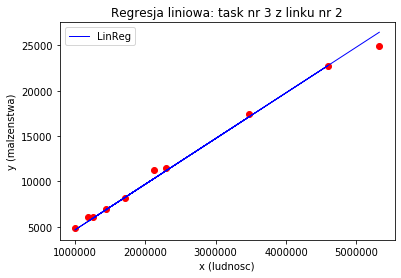

In [5]:
data = pd.read_csv('LinearRegressionLink2.csv')

data_X = data['x (ludnosc)']
data_Y = data['y (malzenstwa)']

data_x_train = data_X[:-10]
data_x_test = data_X[-10:]

data_y_train = data_Y[:-10]
data_y_test = data_Y[-10:]

regr = linear_model.LinearRegression()
regr.fit(data_x_train[:,None], data_y_train[:,None])
        
plt.scatter(data_x_test, data_y_test,  color='red')
plt.plot(data_x_test, regr.predict(data_x_test[:,None]), color='blue', linewidth=1, label='LinReg')
plt.title('Regresja liniowa: task nr 3 z linku nr 2')
plt.legend()
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.show()

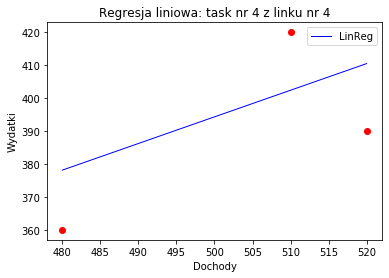

In [6]:
data = pd.read_csv('LinearRegressionLink4.csv')

data_X = data['Dochody']
data_Y = data['Wydatki']

data_x_train = data_X[:-3]
data_x_test = data_X[-3:]

data_y_train = data_Y[:-3]
data_y_test = data_Y[-3:]

regr = linear_model.LinearRegression()
regr.fit(data_x_train[:,None], data_y_train[:,None])
        
plt.scatter(data_x_test, data_y_test,  color='red')
plt.plot(data_x_test, regr.predict(data_x_test[:,None]), color='blue', linewidth=1, label='LinReg')
plt.title('Regresja liniowa: task nr 4 z linku nr 4')
plt.legend()
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.show()

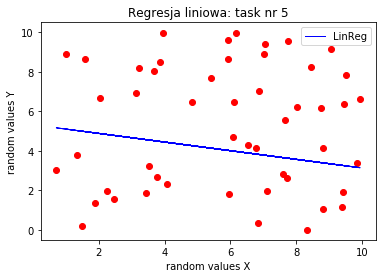

In [7]:
data = np.random.random((2,100))*10

data_x_train = data[0,:-50]
data_x_test = data[0,-50:]

data_y_train = data[1,:-50]
data_y_test = data[1,-50:]

regr = linear_model.LinearRegression()
regr.fit(data_x_train[:,None], data_y_train[:,None])
        
plt.scatter(data_x_test, data_y_test,  color='red')
plt.plot(data_x_test, regr.predict(data_x_test[:,None]), color='blue', linewidth=1, label='LinReg')
plt.title('Regresja liniowa: task nr 5')
plt.legend()
plt.xlabel('random values X')
plt.ylabel('random values Y')
plt.show()